# Financial Data Extraction

## Business Understanding

**Objective :** 
>Extract and visualize financial data for popular stocks (Tesla, Amazon, AMD, and GameStop).

>Use of y-finance (package) API to obtain the stock ticker and extract information about the stock

**Stocks** : 
>A stock, (also known as equity) is a security that represents the ownership of a fraction of the issuing corporation.

>Units of stock are called shares, which entitle the owner to a proportion of the corporation’s assets and profits equal to how much stock they own.

>An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,
the investor with incur a loss

>The **stock ticker** is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges

## Data Understanding

### Importing the Libraries

In [1]:
# yfinance package library used to download financial data from Yahoo Finance.
# obtains historical market data, stock prices, and various financial metrics for stocks, ETFs, and other financial instruments.
# ! pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests #is used to send HTTP requests in Python
from pprint import pprint

### Using the yfinance Library to Extract Stock Data
- Using the `Ticker` module to create an object that allow us to access functions to extract data.
- We provide the ticker symbol for Stocks.

In [3]:
# Apple company ticker symbol is AAPL
# Creating the Ticker object
apple = yf.Ticker("AAPL")

#### apple.json file is needed for further work.

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
# sets the name of the file where the downloaded content will be saved locally.
file_name = "apple.json" 


# line sends an HTTP GET request to the specified URL
response = requests.get(url) # The response from the server is stored in the response variable
with open(file_name, "wb") as file: # opens a file named apple.json in write-binary mode ('wb')
    file.write(response.content) #writes the content of the HTTP response to the file
# writes the content of the HTTP response to the file

    
print("Download Complete")

# It will download the apple.json file and save it to current working directory.
# response object contains the content of the file and metadata about the request.

Download Complete


### Stock Info

Using the attribute  `info` can extract information about the stock as a Python dictionary.


In [5]:
# Displaying Stock Information from yahoo finance

info = apple.info
pprint(info)

{'52WeekChange': 0.3768046,
 'SandP52WeekChange': 0.25891924,
 'address1': 'One Apple Park Way',
 'ask': 253.04,
 'askSize': 200,
 'auditRisk': 6,
 'averageDailyVolume10Day': 53500590,
 'averageVolume': 43955101,
 'averageVolume10days': 53500590,
 'beta': 1.24,
 'bid': 252.93,
 'bidSize': 300,
 'boardRisk': 1,
 'bookValue': 3.767,
 'city': 'Cupertino',
 'companyOfficers': [{'age': 62,
                      'exercisedValue': 0,
                      'fiscalYear': 2023,
                      'maxAge': 1,
                      'name': 'Mr. Timothy D. Cook',
                      'title': 'CEO & Director',
                      'totalPay': 16239562,
                      'unexercisedValue': 0,
                      'yearBorn': 1961},
                     {'age': 60,
                      'exercisedValue': 0,
                      'fiscalYear': 2023,
                      'maxAge': 1,
                      'name': 'Mr. Luca  Maestri',
                      'title': 'CFO & Senior VP',
      

In [6]:
# Displaying the info from apple json file

import json
with open("apple.json") as Apple_Json:   # opens the file "apple.json" in read mode
    apple_info = json.load(Apple_Json)  # json.load function takes the file object and returns the parsed data, which is stored in the variable apple_info.
apple_info

# file object is referenced by variable Apple_Jason

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

getting `country` using the key country

In [7]:
apple_info["country"]

'United States'

### Getting Major Holders

In [8]:
holders = apple.major_holders
holders

Breakdown,Value
insidersPercentHeld,0.02056
institutionsPercentHeld,0.61934
institutionsFloatPercentHeld,0.63234
institutionsCount,6502.00000


### Getting Institutional Holders

In [9]:
institute_holders = apple.institutional_holders
institute_holders

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0834,1303688506,252876459508
1,2023-06-30,Blackrock Inc.,0.0665,1039640859,201659137420
2,2023-06-30,"Berkshire Hathaway, Inc",0.0586,915560382,177591247296
3,2023-06-30,State Street Corporation,0.0370,578897858,112288817516
4,2023-06-30,"FMR, LLC",0.0196,307066638,59561715772
5,2023-06-30,"Geode Capital Management, LLC",0.0186,291538165,56549657865
6,2023-06-30,Price (T.Rowe) Associates Inc,0.0145,226650943,43963483413
7,2023-06-30,Morgan Stanley,0.0131,204714950,39708558851
8,2022-12-31,Norges Bank Investment Management,0.0107,167374278,21746939940
9,2023-06-30,Northern Trust Corporation,0.0105,164536073,31915062079


### Share History


- A share is the single smallest part of the company's stock that you can buy, the prices of the shares fluctuate over time.
- Using `history()` method we can get the share price of the stock over the certain period of time.
- Usin the `period` parameters we can set the specific timeline. (1d, 5d, 1mo, 6y, max)

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [17]:
# Getting Historical market data
apple_share_hist = apple.history(period="5y")  # last 1 month data
apple_share_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31 00:00:00-05:00,70.270523,71.179413,70.171150,71.172142,100805600,0.0,0.0
2020-01-02 00:00:00-05:00,71.799888,72.856628,71.545402,72.796036,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.020454,72.851784,71.862915,72.088318,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.206062,72.701485,70.953995,72.662704,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.672409,72.929322,72.100418,72.320976,108872000,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [18]:
apple_share_hist.reset_index(inplace=True)

<Axes: xlabel='Date'>

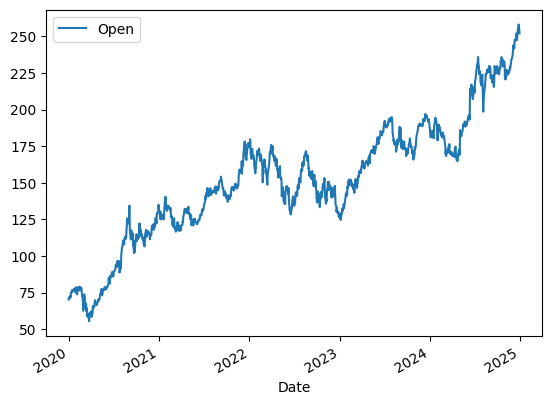

In [19]:
apple_share_hist.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [20]:
apple.dividends

Date
2020-02-07 00:00:00-05:00    0.1925
2020-05-08 00:00:00-04:00    0.2050
2020-08-07 00:00:00-04:00    0.2050
2020-11-06 00:00:00-05:00    0.2050
2021-02-05 00:00:00-05:00    0.2050
2021-05-07 00:00:00-04:00    0.2200
2021-08-06 00:00:00-04:00    0.2200
2021-11-05 00:00:00-04:00    0.2200
2022-02-04 00:00:00-05:00    0.2200
2022-05-06 00:00:00-04:00    0.2300
2022-08-05 00:00:00-04:00    0.2300
2022-11-04 00:00:00-04:00    0.2300
2023-02-10 00:00:00-05:00    0.2300
2023-05-12 00:00:00-04:00    0.2400
2023-08-11 00:00:00-04:00    0.2400
2023-11-10 00:00:00-05:00    0.2400
2024-02-09 00:00:00-05:00    0.2400
2024-05-10 00:00:00-04:00    0.2500
2024-08-12 00:00:00-04:00    0.2500
2024-11-08 00:00:00-05:00    0.2500
Name: Dividends, dtype: float64

<Axes: xlabel='Date'>

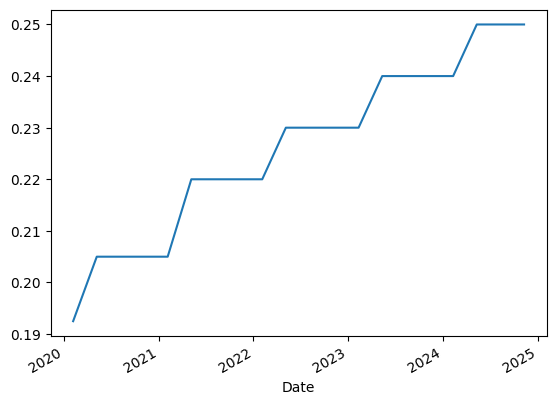

In [21]:
apple.dividends.plot()